In [1]:
import numpy as np
import pandas as pd
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from statsmodels.api import OLS

In [2]:
combined = pd.read_csv("./data/combined_data.csv",
                        parse_dates=[0], index_col=0)
combined

,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
utc_timestamp,,,,,,,,,,,,,,,
2012-01-01 00:00:00+00:00,26049.0,0.0,26663.0,4871.0,4.8564,0.0,0.0,0.1742,4.951,0.0,0.0,0.0114,3.1034,0.8962,1.2252
2012-01-01 01:00:00+00:00,26053.0,0.0,26663.0,5409.0,5.0145,0.0,0.0,0.1624,5.200,0.0,0.0,0.0158,3.0225,0.8915,1.2242
2012-01-01 02:00:00+00:00,26053.0,0.0,26663.0,6094.0,5.2142,0.0,0.0,0.1637,5.468,0.0,0.0,0.0133,2.9386,0.8980,1.2230
2012-01-01 03:00:00+00:00,26053.0,0.0,26663.0,6734.0,5.4012,0.0,0.0,0.1486,5.767,0.0,0.0,0.0077,2.8491,0.9047,1.2214
2012-01-01 04:00:00+00:00,26053.0,0.0,26663.0,7370.0,5.5646,0.0,0.0,0.1386,6.038,0.0,0.0,0.0024,2.7522,0.9215,1.2199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,40634.0,0.0,49021.0,15303.0,4.2129,0.0,0.0,0.0079,-1.932,0.0,0.0,0.0017,0.0617,0.4790,1.2769
2016-12-31 20:00:00+00:00,40634.0,0.0,49021.0,15354.0,4.2875,0.0,0.0,0.0080,-2.090,0.0,0.0,0.0022,0.0631,0.4962,1.2775
2016-12-31 21:00:00+00:00,40634.0,0.0,49021.0,14848.0,4.2965,0.0,0.0,0.0075,-2.289,0.0,0.0,0.0022,0.0646,0.4924,1.2782


In [3]:
solar = combined[['solar_generation_actual', 'solar_capacity', 'windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
solar

,solar_generation_actual,solar_capacity,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,irradiance_surface,irradiance_toa,precipitation,snowfall,cloud_cover,air_density
utc_timestamp,,,,,,,,,,,
2012-01-01 00:00:00+00:00,0.0,26049.0,4.8564,0.0,0.0,0.0,0.0,0.1742,0.0114,0.8962,1.2252
2012-01-01 01:00:00+00:00,0.0,26053.0,5.0145,0.0,0.0,0.0,0.0,0.1624,0.0158,0.8915,1.2242
2012-01-01 02:00:00+00:00,0.0,26053.0,5.2142,0.0,0.0,0.0,0.0,0.1637,0.0133,0.8980,1.2230
2012-01-01 03:00:00+00:00,0.0,26053.0,5.4012,0.0,0.0,0.0,0.0,0.1486,0.0077,0.9047,1.2214
2012-01-01 04:00:00+00:00,0.0,26053.0,5.5646,0.0,0.0,0.0,0.0,0.1386,0.0024,0.9215,1.2199
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,0.0,40634.0,4.2129,0.0,0.0,0.0,0.0,0.0079,0.0017,0.4790,1.2769
2016-12-31 20:00:00+00:00,0.0,40634.0,4.2875,0.0,0.0,0.0,0.0,0.0080,0.0022,0.4962,1.2775
2016-12-31 21:00:00+00:00,0.0,40634.0,4.2965,0.0,0.0,0.0,0.0,0.0075,0.0022,0.4924,1.2782


In [4]:
solar['solar_generation_t+1'] = solar['solar_generation_actual'].shift(periods=1)
solar['solar_generation_t+2'] = solar['solar_generation_actual'].shift(periods=2)
solar['solar_generation_t+3'] = solar['solar_generation_actual'].shift(periods=3)
solar['solar_generation_t+4'] = solar['solar_generation_actual'].shift(periods=4)
solar['solar_generation_t+5'] = solar['solar_generation_actual'].shift(periods=5)
solar['solar_generation_t+6'] = solar['solar_generation_actual'].shift(periods=6)

<ipython-input-4-6c63a12fbea8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar['solar_generation_t+1'] = solar['solar_generation_actual'].shift(periods=1)
<ipython-input-4-6c63a12fbea8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar['solar_generation_t+2'] = solar['solar_generation_actual'].shift(periods=2)
<ipython-input-4-6c63a12fbea8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [5]:
# Drop the first 6 rows of the DataFrame since we cannot have all the values for 'solar_generation_t+n' for (n:1-6)
solar = solar.drop(solar.index[[0,1,2,3,4,5]])
solar

,solar_generation_actual,solar_capacity,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,irradiance_surface,irradiance_toa,precipitation,snowfall,cloud_cover,air_density,solar_generation_t+1,solar_generation_t+2,solar_generation_t+3,solar_generation_t+4,solar_generation_t+5,solar_generation_t+6
utc_timestamp,,,,,,,,,,,,,,,,,
2012-01-01 06:00:00+00:00,0.0,26053.0,5.9523,0.0000,0.0000,0.0000,0.0001,0.1811,0.0003,0.9549,1.2177,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-01 07:00:00+00:00,80.0,26053.0,6.0699,0.0445,3.0608,3.1053,28.6637,0.2678,0.0001,0.9675,1.2170,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-01 08:00:00+00:00,414.0,26053.0,6.4197,0.4666,23.4777,23.9443,168.3756,0.4223,0.0000,0.9732,1.2159,80.0,0.0,0.0,0.0,0.0,0.0
2012-01-01 09:00:00+00:00,854.0,26053.0,6.5836,1.1871,48.0003,49.1874,291.3121,0.3790,0.0000,0.9811,1.2138,414.0,80.0,0.0,0.0,0.0,0.0
2012-01-01 10:00:00+00:00,1141.0,26053.0,6.4434,2.1174,69.2043,71.3217,365.2239,0.2245,0.0000,0.9860,1.2113,854.0,414.0,80.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,0.0,40634.0,4.2129,0.0000,0.0000,0.0000,0.0000,0.0079,0.0017,0.4790,1.2769,0.0,0.0,0.0,68.0,1443.0,4236.0
2016-12-31 20:00:00+00:00,0.0,40634.0,4.2875,0.0000,0.0000,0.0000,0.0000,0.0080,0.0022,0.4962,1.2775,0.0,0.0,0.0,0.0,68.0,1443.0
2016-12-31 21:00:00+00:00,0.0,40634.0,4.2965,0.0000,0.0000,0.0000,0.0000,0.0075,0.0022,0.4924,1.2782,0.0,0.0,0.0,0.0,0.0,68.0


In [17]:
# Assuming solar DataFrame is already defined

# Create lag features
for i in range(1, 7):
    solar[f'solar_generation_t+{i}'] = solar['solar_generation_actual'].shift(periods=i)

# Drop the first 6 rows of the DataFrame since we cannot have all the values for 'solar_generation_t+n' for (n:1-6)
solar = solar.dropna()

# Features and target variable
X = solar[['solar_generation_actual', 'solar_capacity', 'windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
y_list = ['solar_generation_t+1', 'solar_generation_t+2', 'solar_generation_t+3', 'solar_generation_t+4', 'solar_generation_t+5', 'solar_generation_t+6']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, solar[y_list], test_size=0.2, random_state=3)

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train and validate the Linear Regression model for all forecast durations (1 to 6h)
lr = LinearRegression()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(lr, X_train_imputed, y_train[y_list[i]], cv=5)
    print(f"\nThe average score linear regression for {y_list[i]}h is: %0.3f" % np.mean(scores_solar))
    
    # validation of the model
    lr.fit(X_train_imputed, y_train[y_list[i]])
    predictions_lr = lr.predict(X_test_imputed)
    r2 = r2_score(y_test[y_list[i]], predictions_lr)
    print(f"The R2 score of the linear regression model for {y_list[i]}h is r2 = %0.3f" % r2)


The average score linear regression for solar_generation_t+1h is: 0.920
The R2 score of the linear regression model for solar_generation_t+1h is r2 = 0.919

The average score linear regression for solar_generation_t+2h is: 0.726
The R2 score of the linear regression model for solar_generation_t+2h is r2 = 0.723

The average score linear regression for solar_generation_t+3h is: 0.506
The R2 score of the linear regression model for solar_generation_t+3h is r2 = 0.507

The average score linear regression for solar_generation_t+4h is: 0.337
The R2 score of the linear regression model for solar_generation_t+4h is r2 = 0.344

The average score linear regression for solar_generation_t+5h is: 0.253
The R2 score of the linear regression model for solar_generation_t+5h is r2 = 0.262

The average score linear regression for solar_generation_t+6h is: 0.249
The R2 score of the linear regression model for solar_generation_t+6h is r2 = 0.256


In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(solar, test_size=.2, random_state=3)

X_train = train[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.http://localhost:8888/notebooks/final_project/solar_power_generation_forecast.ipynb#1.-Forecasting-the-solar-generation-using-the-LinearRegression-model


X_train = train[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [21]:
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(lr, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score linear regression for t+{i+1}h is: %0.3f" % np.mean(scores_solar))
    # validation of the model
    lr.fit(X_train, train[y_list[i]])
    predictions_lr = lr.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_lr)
    print(f"The R2 score of the linear regression model for t+{i+1}h is r2 = %0.3f" % r2) 


The average score linear regression for t+1h is: 0.920
The R2 score of the linear regression model for t+1h is r2 = 0.918

The average score linear regression for t+2h is: 0.724
The R2 score of the linear regression model for t+2h is r2 = 0.720

The average score linear regression for t+3h is: 0.500
The R2 score of the linear regression model for t+3h is r2 = 0.500

The average score linear regression for t+4h is: 0.327
The R2 score of the linear regression model for t+4h is r2 = 0.332

The average score linear regression for t+5h is: 0.243
The R2 score of the linear regression model for t+5h is r2 = 0.250

The average score linear regression for t+6h is: 0.243
The R2 score of the linear regression model for t+6h is r2 = 0.247


In [22]:
OLS(train['solar_generation_t+1'],X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     solar_generation_t+1   R-squared (uncentered):                   0.941
Model:                              OLS   Adj. R-squared (uncentered):              0.941
Method:                   Least Squares   F-statistic:                          6.926e+04
Date:                  Wed, 20 Dec 2023   Prob (F-statistic):                        0.00
Time:                          01:03:40   Log-Likelihood:                     -3.0858e+05
No. Observations:                 35008   AIC:                                  6.172e+05
Df Residuals:                     35000   BIC:                                  6.172e+05
Df Model:                             8                                                  
Covariance Type:              nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
solar_generation_actual     0.9220      0.006    143.217      0.000       0.909       0.935
solar_capacity              0.0259      0.002     11.599      0.000       0.022       0.030
windspeed_10m              -1.0796      5.383     -0.201      0.841     -11.630       9.471
irradiance_surface          0.8589      0.167      5.132      0.000       0.531       1.187
precipitation              23.9098     73.821      0.324      0.746    -120.782     168.601
snowfall                -1682.8420    354.883     -4.742      0.000   -2378.425    -987.259
cloud_cover                72.9128     40.800      1.787      0.074      -7.057     152.883
air_density              -673.0304     71.809     -9.373      0.000    -813.778    -532.283
==============================================================================
Omnibus:                     1606.217   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4308.887
Skew:                           0.231   Prob(JB):                         0.00
Kurtosis:                       4.655   Cond. No.                     1.48e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
X_train = train[['solar_generation_actual', 'irradiance_surface']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual', 'irradiance_surface']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [24]:
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(lr, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score linear regression for t+{i+1}h is: %0.3f" % np.mean(scores_solar))
    # validation of the model
    lr.fit(X_train, train[y_list[i]])
    predictions_lr = lr.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_lr)
    print(f"The R2 score of the linear regression model for t+{i+1}h is r2 = %0.3f" % r2) 


The average score linear regression for t+1h is: 0.915
The R2 score of the linear regression model for t+1h is r2 = 0.913

The average score linear regression for t+2h is: 0.700
The R2 score of the linear regression model for t+2h is r2 = 0.696

The average score linear regression for t+3h is: 0.438
The R2 score of the linear regression model for t+3h is r2 = 0.438

The average score linear regression for t+4h is: 0.211
The R2 score of the linear regression model for t+4h is r2 = 0.215

The average score linear regression for t+5h is: 0.064
The R2 score of the linear regression model for t+5h is r2 = 0.069

The average score linear regression for t+6h is: 0.004
The R2 score of the linear regression model for t+6h is r2 = 0.005


In [25]:
# Let's get a summary on how the model fits for t+1h
OLS(train['solar_generation_t+1'],X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     solar_generation_t+1   R-squared (uncentered):                   0.940
Model:                              OLS   Adj. R-squared (uncentered):              0.940
Method:                   Least Squares   F-statistic:                          2.743e+05
Date:                  Wed, 20 Dec 2023   Prob (F-statistic):                        0.00
Time:                          01:55:48   Log-Likelihood:                     -3.0875e+05
No. Observations:                 35008   AIC:                                  6.175e+05
Df Residuals:                     35006   BIC:                                  6.175e+05
Df Model:                             2                                                  
Covariance Type:              nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
solar_generation_actual     0.9361      0.006    149.603      0.000       0.924       0.948
irradiance_surface          0.8396      0.159      5.265      0.000       0.527       1.152
==============================================================================
Omnibus:                     1506.817   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4394.297
Skew:                           0.167   Prob(JB):                         0.00
Kurtosis:                       4.703   Cond. No.                         122.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
X_train = train[['solar_generation_actual']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [27]:
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(lr, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score linear regression for t+{i+1}h is: %0.3f" % np.mean(scores_solar))
    # validation of the model
    lr.fit(X_train, train[y_list[i]])
    predictions_lr = lr.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_lr)
    print(f"The R2 score of the linear regression model for t+{i+1}h is r2 = %0.3f" % r2) 


The average score linear regression for t+1h is: 0.915
The R2 score of the linear regression model for t+1h is r2 = 0.913

The average score linear regression for t+2h is: 0.699
The R2 score of the linear regression model for t+2h is r2 = 0.696

The average score linear regression for t+3h is: 0.437
The R2 score of the linear regression model for t+3h is r2 = 0.437

The average score linear regression for t+4h is: 0.209
The R2 score of the linear regression model for t+4h is r2 = 0.214

The average score linear regression for t+5h is: 0.063
The R2 score of the linear regression model for t+5h is r2 = 0.068

The average score linear regression for t+6h is: 0.004
The R2 score of the linear regression model for t+6h is r2 = 0.005


In [28]:
# Let's get a summary on how the model fits for t+1h
OLS(train['solar_generation_t+1'],X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     solar_generation_t+1   R-squared (uncentered):                   0.940
Model:                              OLS   Adj. R-squared (uncentered):              0.940
Method:                   Least Squares   F-statistic:                          5.481e+05
Date:                  Wed, 20 Dec 2023   Prob (F-statistic):                        0.00
Time:                          01:57:01   Log-Likelihood:                     -3.0877e+05
No. Observations:                 35008   AIC:                                  6.175e+05
Df Residuals:                     35007   BIC:                                  6.175e+05
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
solar_generation_actual     0.9683      0.001    740.333      0.000       0.966       0.971
==============================================================================
Omnibus:                     1497.271   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4465.258
Skew:                           0.151   Prob(JB):                         0.00
Kurtosis:                       4.723   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
X_train = train[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [30]:
rf = RandomForestRegressor()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(rf, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decisions trees) and t+{i+1}h is: %0.3f" % np.mean(scores_solar))
    # validation of the model
    rf.fit(X_train, train[y_list[i]])
    predictions_rf = rf.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2) 


The average score for random forest regression (100 decisions trees) and t+1h is: 0.939
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.940

The average score for random forest regression (100 decisions trees) and t+2h is: 0.810
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.817

The average score for random forest regression (100 decisions trees) and t+3h is: 0.697
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.706

The average score for random forest regression (100 decisions trees) and t+4h is: 0.648
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = 0.675

The average score for random forest regression (100 decisions trees) and t+5h is: 0.599
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = 0.634

The average score for random forest regression (100 decisions trees) and t+6h is: 0.

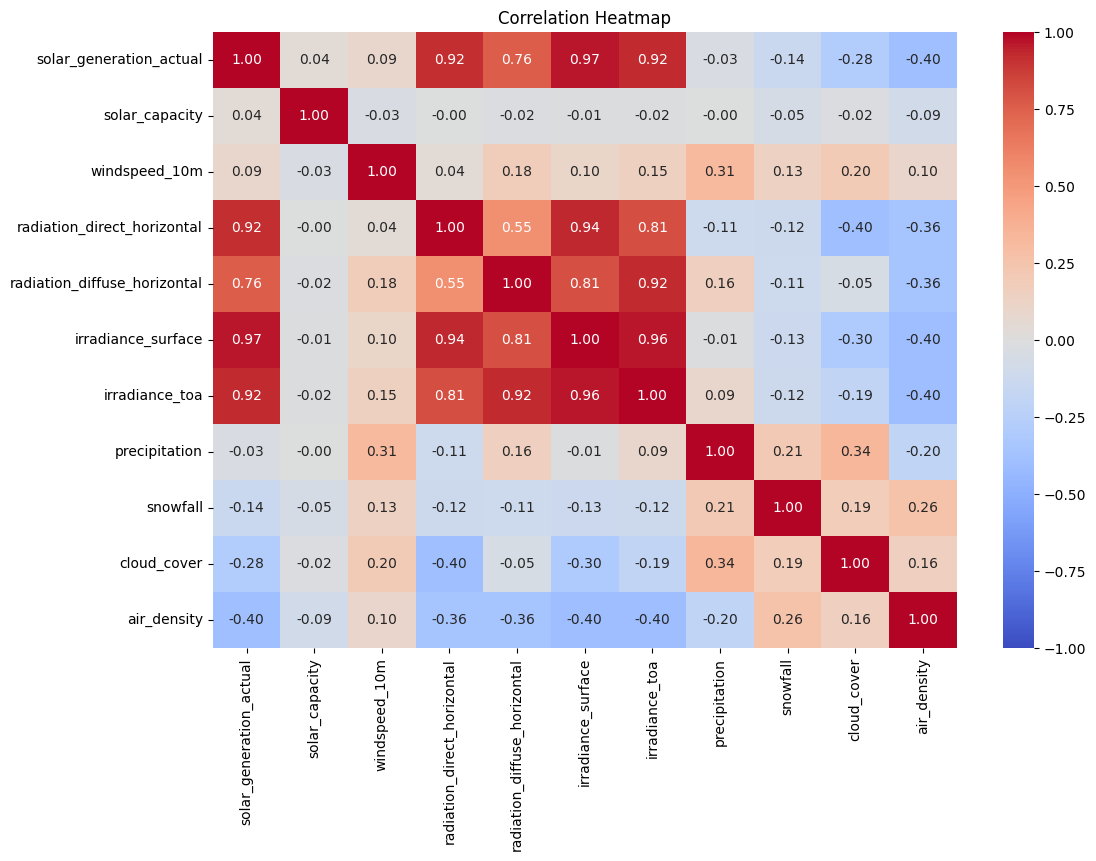

In [32]:
corr_matrix = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [33]:
X_train = train[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [34]:
rf = RandomForestRegressor()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(rf, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decisions trees) and t+{i+1}h is: %0.3f" % np.mean(scores_solar))
    # validation of the model
    rf.fit(X_train, train[y_list[i]])
    predictions_rf = rf.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2) 


The average score for random forest regression (100 decisions trees) and t+1h is: 0.934
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.936

The average score for random forest regression (100 decisions trees) and t+2h is: 0.797
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.801

The average score for random forest regression (100 decisions trees) and t+3h is: 0.686
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.696

The average score for random forest regression (100 decisions trees) and t+4h is: 0.654
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = 0.685

The average score for random forest regression (100 decisions trees) and t+5h is: 0.600
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = 0.630

The average score for random forest regression (100 decisions trees) and t+6h is: 0.

In [35]:
X_train = train[['solar_generation_actual', 'irradiance_surface']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual', 'irradiance_surface']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [36]:
rf = RandomForestRegressor()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(rf, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decisions trees) and t+{i+1}h is: %0.3f" % np.mean(scores_solar))
    # validation of the model
    rf.fit(X_train, train[y_list[i]])
    predictions_rf = rf.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2) 


The average score for random forest regression (100 decisions trees) and t+1h is: 0.901
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.901

The average score for random forest regression (100 decisions trees) and t+2h is: 0.661
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.664

The average score for random forest regression (100 decisions trees) and t+3h is: 0.384
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.393

The average score for random forest regression (100 decisions trees) and t+4h is: 0.151
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = 0.167

The average score for random forest regression (100 decisions trees) and t+5h is: 0.000
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = 0.019

The average score for random forest regression (100 decisions trees) and t+6h is: -0

In [37]:
X_train = train[['solar_generation_actual']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [38]:
rf = RandomForestRegressor()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(rf, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decisions trees) and t+{i+1}h is: %0.3f" % np.mean(scores_solar))
    # validation of the model
    rf.fit(X_train, train[y_list[i]])
    predictions_rf = rf.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2) 


The average score for random forest regression (100 decisions trees) and t+1h is: 0.881
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.880

The average score for random forest regression (100 decisions trees) and t+2h is: 0.590
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.594

The average score for random forest regression (100 decisions trees) and t+3h is: 0.253
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.271

The average score for random forest regression (100 decisions trees) and t+4h is: -0.023
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = 0.012

The average score for random forest regression (100 decisions trees) and t+5h is: -0.187
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = -0.149

The average score for random forest regression (100 decisions trees) and t+6h is: